In [343]:
import pandas as pd
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
INPUT_DATA_FOLDER = "isw_data"
DATA_FILE = "table_of_data_preprocessed.csv"

OUTPUT_FOLDER = "isw_data"
OUTPUT_DATA_FILE = "table_of_data_processed.csv"

C:\Users\IvarY\AppData\Local\Temp\ipykernel_2348\143117762.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


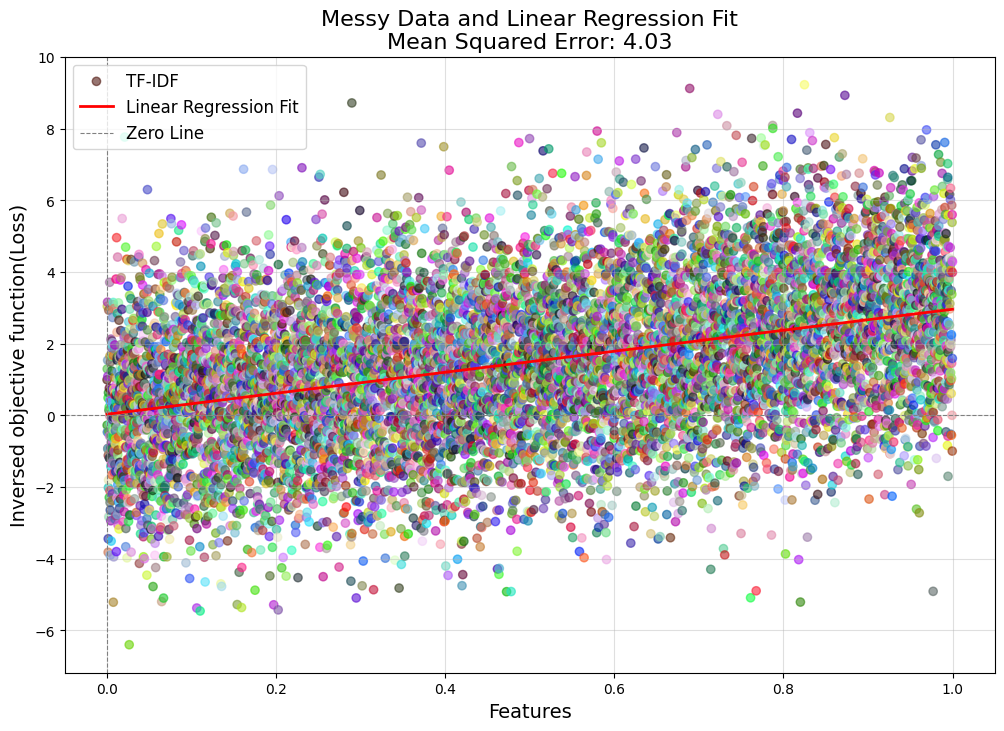

In [300]:
df = pd.read_csv(f"{DATA_FILE}")

In [301]:
df.head(10)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8
0,0,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces entered major Ukrainian cit...
1,1,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces’ main axes of advance in th...
2,2,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nThe Russian military has likely recognized...
3,3,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...
4,4,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...
5,5,2022-03-02,"Russian Offensive Campaign Assessment, March 2...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",Russian forces resumed offensive operations in...
6,6,2022-03-03,Ukraine Conflict Update 14 | Institute for the...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...","\r\nwith the Critical Threats Project, AEI\r\n..."
7,7,2022-03-04,Ukraine Conflict Update 15 | Institute for the...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...","\r\nwith the Critical Threats Project, AEI\r\n..."
8,8,2022-03-05,"Explainer on Russian Conscription, Reserve, an...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nThe early announcement of the spring draf...
9,9,2022-03-06,Ukraine Conflict Update 16 | Institute for the...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...","\r\nwith the Critical Threats Project, AEI\r\n..."


In [302]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [303]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]

In [304]:
stopwords = nltk.corpus.stopwords.words("english")

In [305]:
df['main_html'] = df['main_html_v8'].apply(lambda x: x.lower())
#display(HTML(df.iloc[0]["main_html"]))

In [306]:
import unicodedata


def remove_special_characters(data):
    result = unicodedata.normalize("NFKD", data)
    #CHARS_TO_REMOVE=['\r','\n']
    return result.replace('\r', ' ').replace('\n', ' ')

In [307]:
df['main_html1'] = df['main_html'].apply(lambda x: remove_special_characters(x))
df['main_html1'][0]

'  russian forces entered major ukrainian cities—including kyiv and kherson—for the first time on february 25. russian forces’ main axes of advance focused on kyiv (successfully isolating the city on both banks of the dnipro river). russian military operations along ukraine’s northern border have been less well-planned, organized, and conducted than those emanating from crimea. they have also been less successful so far. the divergence in performance likely arises in part from differences in the composition and organization of the russian ground forces elements in the western military district and belarus (to ukraine’s north) and southern military district and black sea fleet (to its south and east), as isw has previously observed. determined and well-organized ukrainian resistance around kyiv and kharkiv has also played an important role in preventing the russian military from advancing with the speed and success for which it had reportedly planned. the russian military has deployed a

In [308]:
import string

def remove_any_punct(q):
    result=" "
    # for char in q:
    #     if char.isalpha():
    #         result.join(char)
    #     else:
    #         result.join(" ")
    # return result
    return q.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

In [309]:
#df=df.drop(['main_html2'], axis=1)
#df['main_html'][0]
df['main_html2'] = df['main_html1'].apply(lambda x: remove_any_punct(x))
#print(df.iloc[0]['main_html'])
#print(df.iloc[0]['main_html2'])
#df['main_html2'][0]

In [310]:
def remove_one_letter_word (data):
    word_tokens = nltk.word_tokenize(str(data))
    new_text = ""
    for w in word_tokens:
        if len(w) == 1 :
            continue

        new_text= new_text + " " + w
    return new_text

In [311]:
#remove_one_letter_word(df.iloc[0]["main_html"])
df['main_html3'] = df['main_html2'].apply(lambda x: remove_one_letter_word(x))
#print(df.iloc[0]["main_html3"])
#df['main_html3'][0]

In [312]:
df['main_html3'][0]

' russian forces entered major ukrainian cities—including kyiv and kherson—for the first time on february 25 russian forces main axes of advance focused on kyiv successfully isolating the city on both banks of the dnipro river russian military operations along ukraine northern border have been less well planned organized and conducted than those emanating from crimea they have also been less successful so far the divergence in performance likely arises in part from differences in the composition and organization of the russian ground forces elements in the western military district and belarus to ukraine north and southern military district and black sea fleet to its south and east as isw has previously observed determined and well organized ukrainian resistance around kyiv and kharkiv has also played an important role in preventing the russian military from advancing with the speed and success for which it had reportedly planned the russian military has deployed additional forces to s

In [329]:
# df=df.drop(['title', 'text_title', 'text_main', 'main_html_v8', 'main_html'], axis=1)
# df

In [330]:
def remove_stopwords(data):
    word_tokens = nltk.word_tokenize(str(data))
    stop_stop_words = {"no", "not"}
    stop_words = set(stopwords) - stop_stop_words
    result = ""
    for w in word_tokens:
        if w not in stop_words:
            result = result + " " + w
    return result

In [339]:
def stemming(data):
    stemmer = nltk.PorterStemmer()
    tokens = nltk.word_tokenize(str(data))
    result = ""
    for w in tokens:
        result = result + " " + stemmer.stem(w)
    return result
nltk.download('wordnet')
def lemmatizing(data):
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = nltk.word_tokenize(str(data))
    result = ""
    for w in tokens:
        result = result + " " + lemmatizer.lemmatize(w)
    return result

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IvarY\AppData\Roaming\nltk_data...


In [332]:
from num2words import num2words
def convert_numbers(data):
    tokens = nltk.word_tokenize(str(data))
    result=""
    for w in tokens :
        if w.isdigit():
            if(int(w)>10000000000):
                continue
            w = remove_any_punct(num2words(w))
        result = result + ' ' + w
    return result

In [334]:
df['main_html4']=df['main_html3'].apply(lambda x: convert_numbers(x)).apply(lambda x: remove_stopwords(x))
df['main_html4'][0]

' russian forces entered major ukrainian cities—including kyiv kherson—for first time february twenty five russian forces main axes advance focused kyiv successfully isolating city banks dnipro river russian military operations along ukraine northern border less well planned organized conducted emanating crimea also less successful far divergence performance likely arises part differences composition organization russian ground forces elements western military district belarus ukraine north southern military district black sea fleet south east isw previously observed determined well organized ukrainian resistance around kyiv kharkiv also played important role preventing russian military advancing speed success reportedly planned russian military deployed additional forces southeastern belarus likely beyond moscow planned use ukraine offset problems challenges russian forces remain much larger capable ukraine conventional military however russia likely defeat ukrainian regular military 

In [335]:
df['data_stemmed'] = df['main_html4'].apply(lambda x: stemming(x))
df['data_stemmed'][0]

' russian forc enter major ukrainian cities—includ kyiv kherson—for first time februari twenti five russian forc main axe advanc focus kyiv success isol citi bank dnipro river russian militari oper along ukrain northern border less well plan organ conduct eman crimea also less success far diverg perform like aris part differ composit organ russian ground forc element western militari district belaru ukrain north southern militari district black sea fleet south east isw previous observ determin well organ ukrainian resist around kyiv kharkiv also play import role prevent russian militari advanc speed success reportedli plan russian militari deploy addit forc southeastern belaru like beyond moscow plan use ukrain offset problem challeng russian forc remain much larger capabl ukrain convent militari howev russia like defeat ukrainian regular militari forc secur territori object point come day week putin determin will pay cost blood treasur key takeaway russian forc enter outskirt kyiv wes

In [340]:
df['data_lemmatized'] = df['main_html4'].apply(lambda x: lemmatizing(x))
df['data_lemmatized'][0]

' russian force entered major ukrainian cities—including kyiv kherson—for first time february twenty five russian force main ax advance focused kyiv successfully isolating city bank dnipro river russian military operation along ukraine northern border le well planned organized conducted emanating crimea also le successful far divergence performance likely arises part difference composition organization russian ground force element western military district belarus ukraine north southern military district black sea fleet south east isw previously observed determined well organized ukrainian resistance around kyiv kharkiv also played important role preventing russian military advancing speed success reportedly planned russian military deployed additional force southeastern belarus likely beyond moscow planned use ukraine offset problem challenge russian force remain much larger capable ukraine conventional military however russia likely defeat ukrainian regular military force secure terr

In [347]:
df.head(15)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8,main_html,main_html1,main_html2,main_html3,main_html4,data_stemmed,data_lemmatized
0,0,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces entered major Ukrainian cit...,\r\nrussian forces entered major ukrainian cit...,russian forces entered major ukrainian citie...,russian forces entered major ukrainian citie...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...
1,1,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces’ main axes of advance in th...,\r\nrussian forces’ main axes of advance in th...,russian forces’ main axes of advance in the ...,russian forces’ main axes of advance in the ...,russian forces main axes of advance in the la...,russian forces main axes advance last twenty ...,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...
2,2,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nThe Russian military has likely recognized...,\r\nthe russian military has likely recognized...,the russian military has likely recognized t...,the russian military has likely recognized t...,the russian military has likely recognized th...,russian military likely recognized initial ex...,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...
3,3,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its mili...,russian military reorganizing military effort...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...
4,4,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforceme...,russian forces completing reinforcement resup...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...
5,5,2022-03-02,"Russian Offensive Campaign Assessment, March 2...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",Russian forces resumed offensive operations in...,russian forces resumed offensive operations in...,russian forces resumed offensive operations in...,russian forces resumed offensive operations in...,russian forces resumed offensive operations i...,russian forces resumed offensive operations s...,russian forc resum offens oper support envelo...,russian force resumed offensive operation sup...
6,6,2022-03-03,Ukraine Conflict Update 14 | Institute for the...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...","\r\nwith the Critical Threats Project, AEI\r\n...","\r\nwith the critical threats project, aei\r\n...","with the critical threats project, aei marc...",with the critical threats project aei marc...,with the critical threats project aei march i...,critical threats project aei march isw publis...,cri

In [354]:
df.to_csv(f"{OUTPUT_FOLDER}/{OUTPUT_DATA_FILE}", sep=";", index=False)

In [350]:
#df[['date', 'data_stemmed', 'data_lemmatized']]

,date,data_stemmed,data_lemmatized
0,2022-02-25,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...
1,2022-02-26,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...
2,2022-02-27,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...
3,2022-02-28,russian militari reorgan militari effort atte...,russian military reorganizing military effort...
4,2022-03-01,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...
...,...,...,...
319,2023-01-16,click see isw interact map russian invas ukra...,click see isw interactive map russian invasio...
320,2023-01-17,kateryna stepanenko karolina hird riley baile...,kateryna stepanenko karolina hird riley baile...
321,2023-01-18,click see isw interact map russian invas ukra...,click see isw interactive map russian invasio...
322,2023-01-19,georg barro riley bailey kateryna stepanenko ...,george barros riley bailey kateryna stepanenk...


In [355]:
df = pd.read_csv(f"{OUTPUT_FOLDER}/{OUTPUT_DATA_FILE}", sep=";")

In [356]:
df.head(5)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8,main_html,main_html1,main_html2,main_html3,main_html4,data_stemmed,data_lemmatized
0,0,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces entered major Ukrainian cit...,\r\nrussian forces entered major ukrainian cit...,russian forces entered major ukrainian citie...,russian forces entered major ukrainian citie...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...
1,1,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces’ main axes of advance in th...,\r\nrussian forces’ main axes of advance in th...,russian forces’ main axes of advance in the ...,russian forces’ main axes of advance in the ...,russian forces main axes of advance in the la...,russian forces main axes advance last twenty ...,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...
2,2,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nThe Russian military has likely recognized...,\r\nthe russian military has likely recognized...,the russian military has likely recognized t...,the russian military has likely recognized t...,the russian military has likely recognized th...,russian military likely recognized initial ex...,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...
3,3,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its mili...,russian military reorganizing military effort...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...
4,4,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforceme...,russian forces completing reinforcement resup...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...


In [357]:
docs = df['data_lemmatized'].tolist()
len(docs)

324

In [359]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
cv = CountVectorizer(max_df=0.98, min_df=2)
word_count_vector = cv.fit_transform(docs)
word_count_vector.shape

(324, 8972)

In [362]:
import pickle
with open("./model/count_vectorizer_v1.pkl", 'wb') as handle:
    pickle.dump(cv, handle)

In [363]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True,)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [364]:
with open("model/tfidf_transformer_v1.pkl", 'wb') as handle:
    pickle.dump(tfidf_transformer, handle)

In [365]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(), columns=["idf_weights"])
df_idf.sort_values(by=['idf_weights'])

,idf_weights
area,1.021774
kharkiv,1.021774
attack,1.024923
combat,1.028083
position,1.028083
...,...
militaristic,5.685213
mimic,5.685213
minefield,5.685213
mineralne,5.685213


In [366]:
tf_idf_vector = tfidf_transformer.transform(word_count_vector)

In [368]:
tfidf = pickle.load(open("model/tfidf_transformer_v1.pkl", "rb"))
cv = pickle.load(open("model/count_vectorizer_v1.pkl", "rb"))

In [369]:
feature_names = cv.get_feature_names_out()

In [370]:
feature_names

array(['10', '100', '100km', ..., 'zyuganov', 'коридор', 'сухопутныи'],
      dtype=object)

In [371]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    results = {}

    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

def conver_doc_to_vector(doc):
    feature_names = cv.get_feature_names_out()
    top_n = 100
    tf_idf_vector = tfidf.transform(cv.transform([doc]))

    sorted_items = sort_coo(tf_idf_vector.tocoo())

    keywords = extract_topn_from_vector(feature_names, sorted_items, top_n)

    return keywords

In [373]:
df['keywords'] = df['data_lemmatized'].apply(lambda x: conver_doc_to_vector(x))

In [374]:
df.head(10)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8,main_html,main_html1,main_html2,main_html3,main_html4,data_stemmed,data_lemmatized,keywords
0,0,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces entered major Ukrainian cit...,\r\nrussian forces entered major ukrainian cit...,russian forces entered major ukrainian citie...,russian forces entered major ukrainian citie...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...,"{'february': 0.339, 'kyiv': 0.323, 'pm': 0.298..."
1,1,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nRussian forces’ main axes of advance in th...,\r\nrussian forces’ main axes of advance in th...,russian forces’ main axes of advance in the ...,russian forces’ main axes of advance in the ...,russian forces main axes of advance in the la...,russian forces main axes advance last twenty ...,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0..."
2,2,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",\r\nThe Russian military has likely recognized...,\r\nthe russian military has likely recognized...,the russian military has likely recognized t...,the russian military has likely recognized t...,the russian military has likely recognized th...,russian military likely recognized initial ex...,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...,"{'february': 0.496, 'seven': 0.35, 'twenty': 0..."
3,3,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its mili...,russian military reorganizing military effort...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...,"{'february': 0.553, 'eight': 0.348, 'twenty': ..."
4,4,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforceme...,russian forces completing reinforcement resup...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...,"{'kyiv': 0.359, 'chernihiv': 0.219, 'hour': 0...."
5,5,2022-03-02,"Russian Offensive Campaign Assessment, March 2...","Russian Offensive Campaign Assessment, January...","<div class=""field field-name-body field-type-t...",Russian forces resumed offensive operations in...,russian forces resumed offensive operations in...,russian forces resumed offensive operations in...,russian forces resumed offensive operations in...,russian forces resumed offensive operations i...,russian forces resumed offensive operations s...,russian forc resum offens oper support envelo...,russian force resumed offensive operation sup...,"{'march': 0.561, 'kyiv': 0.392, 'chernihiv': 0..."
6,6,2022-03-03,Ukraine Conflict Update 14 | Institute for the...,"Russian Offensive Campaign Assessment, January...","<div class=""field field-name-b

In [381]:
df['keywords'][0]

{'february': 0.339,
 'kyiv': 0.323,
 'pm': 0.298,
 'twenty': 0.215,
 'five': 0.193,
 'local': 0.154,
 'belarus': 0.149,
 'time': 0.142,
 'zero': 0.141,
 'bypassed': 0.133,
 'frontal': 0.126,
 'envelop': 0.124,
 'chernihiv': 0.12,
 'advancing': 0.101,
 'entered': 0.1,
 'clothes': 0.097,
 'determined': 0.086,
 'odessa': 0.082,
 'captured': 0.077,
 'enter': 0.077,
 'dnipro': 0.077,
 'may': 0.077,
 'east': 0.076,
 'amphibious': 0.075,
 'stolin': 0.075,
 'headed': 0.075,
 'active': 0.073,
 'verge': 0.072,
 'landing': 0.071,
 'air': 0.071,
 'crimea': 0.068,
 'next': 0.068,
 'four': 0.068,
 'failed': 0.067,
 'vdv': 0.067,
 'kharkiv': 0.067,
 'assembling': 0.066,
 'capability': 0.065,
 'outskirt': 0.064,
 'rivne': 0.064,
 'bypassing': 0.064,
 'broad': 0.064,
 'element': 0.062,
 'axis': 0.061,
 'bank': 0.061,
 'envelopment': 0.06,
 'downtown': 0.06,
 'achieved': 0.06,
 'airborne': 0.06,
 'southeastern': 0.06,
 'reportedly': 0.059,
 'refrain': 0.058,
 'pin': 0.057,
 'planned': 0.057,
 'hostomel'

In [384]:
df.to_csv("./text_vectorized.csv", sep=";", index=False)